# Lecture 3 : Reading, Writing and Plotting Datasets.

In the last lecture we studied a very memory efficient way of handling data values of same type packed in an object called *numpy.ndarray* using the module **Numpy**.

We also saw how using notebook we were able to plot 1D curves using *matplotlib* and do annotation of axis, text, legend and so on.

In the first part of this lecture we go back again to matplotlib to understand how to make 2D surface plots and then go ahead to I/O methods provided by *Python* and associated libraries.

    **New Library Required** : csv, pyfits

 **MATPLOTLIB 2D IMAGING**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Create a random 2D array
mu, sigma = 3.0, 9.0
D = mu + sigma*np.random.randn(128,128)

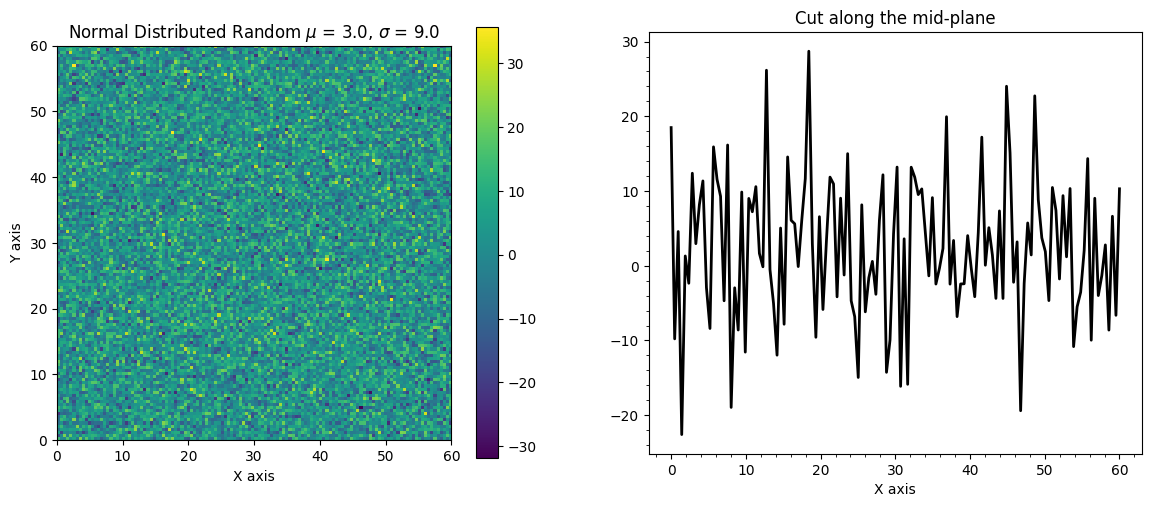

In [3]:
f1 = plt.figure(figsize=[14,8], dpi=100)
ax1 = plt.subplot(121)
im1 = ax1.imshow(D,extent=[0.0,60.0,0.0,60.0])   # USE WHEN MESH IS UNIFORM.
plt.colorbar(im1,orientation='vertical', shrink=0.7)
plt.xlabel(r'X axis')
plt.ylabel(r'Y axis')
plt.title(r'Normal Distributed Random $\mu$ = 3.0, $\sigma$ = 9.0')

ax2 = plt.subplot(122)
ax2.plot(np.linspace(0.0,60.0,128), D[:,64], 'k-',lw=2)
ax2.set_aspect('equal')
ax2.set_xlabel(r'X axis')
ax2.set_title(r'Cut along the mid-plane')
ax2.minorticks_on()

Text(0, 0.5, 'Y axis')

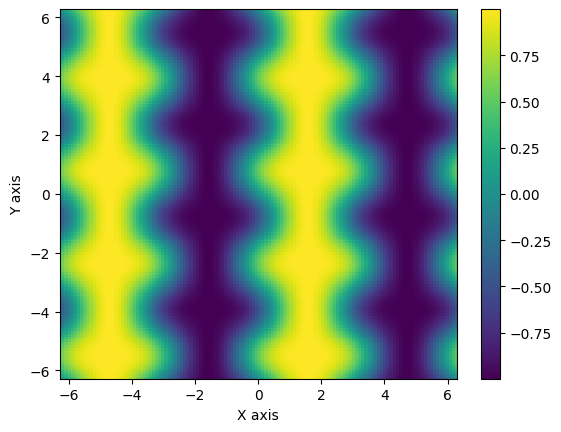

In [4]:
x = np.linspace(-2.0*np.pi, 2.0*np.pi,128)
y = np.linspace(-2.0*np.pi, 2.0*np.pi,128)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)*np.sin(Y)*np.cos(X)*np.cos(X)

im1 = plt.pcolormesh(x, y, Z)             # USED WHEN THE MESHGRID IS NON UNIFORM.
plt.colorbar(im1)
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.xlabel(r'X axis')
plt.ylabel(r'Y axis')
#plt.savefig("nameofpngfile.png")

In [5]:
# Discrete Fourier Transform with Numpy -- np.fft.
#np.fft?

<class 'float'>


<ipython-input-6-663f662bb0de>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  freq = np.linspace(0.0, (1./(2.*T)), np.int(N/2))
<ipython-input-6-663f662bb0de>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Num

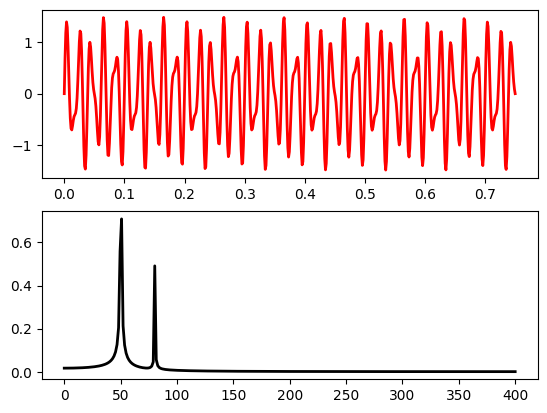

In [6]:
# no of sample points
N = 600
# Interval in time domain.
T = 1./800.
print(type(N/2))
tm = np.linspace(0.0, N*T, N)
sig = np.sin(50.0*2.0*np.pi*tm) + 0.5*np.sin(80.0*2.0*np.pi*tm)
sigf = np.fft.fft(sig)
freq = np.linspace(0.0, (1./(2.*T)), np.int(N/2))
ax1 = plt.subplot(211)
ax1.plot(tm, sig,'r',lw=2)
ax2 = plt.subplot(212)
ax2.plot(freq, (2./N)*np.abs(sigf[:np.int(N/2)]), 'k', lw=2)

**I/O WITH PYTHON**

The I/O routines provided by numpy to load data and write data to files are as follows.

*Loading from file*

**np.load**    ---     Load data from *.npy* or *.npz* file

**np.loadtxt** ---     When no data is missing then use

**np.genfromtxt** --- With missing data.

**np.fromfile**   --- Read text from files.  

*Writing to File*

**np.save**           ---- Write single array in a binary file *.npy*  

**np.savez**          ---- Write multiple arrays in a binary file *.npz*

**np.ndarray.tofile** ---- Write data to a file as text or binary (default).  


Apart from the above there are native python read and write functions that we will see.
Additionally, we also have external libraries for reading a custom datasets.

# New section

In [7]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [8]:
# Saving and loading array
a = np.diag([1.,-10., 2.0, 4.0])
np.save('diagonal.npy', a)
b = np.load('diagonal.npy')
print(a == b)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [9]:
# !ls

In [10]:
# cd drive/

In [11]:
# !ls

In [12]:
# cd MyDrive/

In [13]:
# ls

In [14]:
cd AA651

[Errno 2] No such file or directory: 'AA651'
/content


In [15]:
!ls

definitions.h						  example.csv
diagonal.npy						  python_test_files.sav
drive							  sample_data
example_beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_YX.fits  simulated_star.fits


In [16]:
# Reading simple Text file with Ignoring Comments ::: NATIVE PYTHON AND LISTS.

#Step 1 : Open the file of reading.
fp = open('definitions.h', 'r')

#Run a for loop for all lines.
for line in fp.readlines():
    print(line)

fp.close()

/* This is 3rd Lecture. */



Hi this is AA651.

I welcome you all.



In [17]:
#Step 1 : Open the file of reading.
fp = open('definitions.h', 'r')
comment = []
text    = []
#Run a for loop for all lines.
for line in fp.readlines():
    scrh = line.split()
    if len(scrh) > 0:
        if scrh[0] == '/*':
            comment.append(line)
        else:
            text.append(line)
    else:
        continue

fp.close()

#fc = open('def_comments.txt','w')
#for l in comment:
#    fc.write(l)
#fc.close()


In [18]:
text

['Hi this is AA651.\n', 'I welcome you all.\n']

dict_keys(['X pos', 'Y pos', 'speed'])


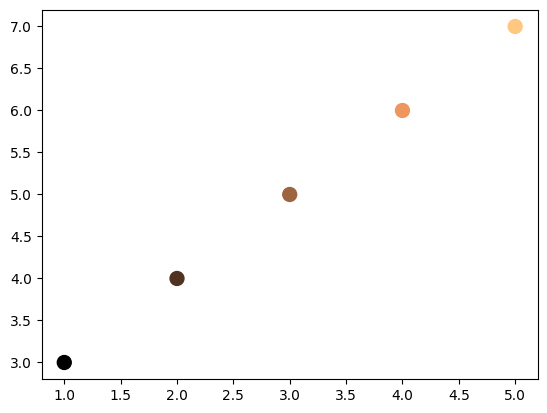

In [19]:
#To get header info.
fp = open('example.csv','r')
header = fp.readline().strip().split(',')   # Strip removes the '\n' and splits breaks into components of a list.
fp.close()

#To get Data.
D = np.loadtxt('example.csv',skiprows=1, delimiter=',')
#for i in range(len(header)):
#    print i, header[i]
#print D.shape

#To build a dictionary with key, value pairs.
kvlist = []
for i in range(len(header)):
    kvlist.append((header[i].split('(')[0].strip(), D[:,i]))   # Here strip removes trailing spaces.
Data = {}
for k,v in kvlist:
    Data[k] = v
print(Data.keys())

plt.scatter(Data['X pos'], Data['speed'],s=100,marker='o',c=Data['speed'],cmap='copper')
plt.show()

0 X pos
1 Y pos
2 speed


Text(0, 0.5, 'speed')

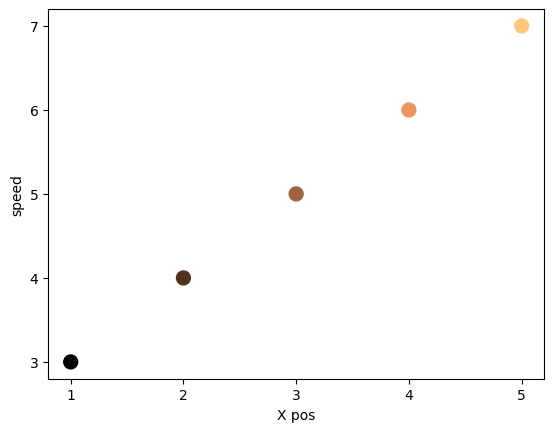

In [20]:
# Reading from CSV file.
import csv
with open('example.csv', 'r') as f:
    reader = csv.reader(f)
    D = [row for row in reader]

header = np.array(D[0])
Data = np.array(D[1:])

speed_column = Data[:, 2].astype(float)

for i in range(len(header)):
    print(i, header[i])
plt.scatter(Data[:,0], Data[:, 2], marker='o',s=100, c = speed_column, cmap='copper')
# plt.scatter(Data[:,0], Data[:, 2], marker='o',s=100*speed_column)
plt.xlabel(header[0])
plt.ylabel(header[2])

In [21]:
Data[0]

array(['1', '2', '3'], dtype='<U1')

In [22]:
#Writing CSV file.

f = open('dummy.csv', 'w')
try:
    writer = csv.writer(f)
    writer.writerow( ('Title 1', 'Title 2', 'Title 3') )
    for i in range(10):
        writer.writerow( (i+1, chr(ord('a') + i), '08/%02d/17' % (i+1)) )
finally:
    f.close()


**FITS FILE READING USING PYFITS**

The pyfits is available at : http://www.stsci.edu/institute/software_hardware/pyfits

In [23]:
# pip install pyfits

In [24]:
# import pyfits

# datalist = pyfits.open('example_beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_YX.fits')
# print(datalist.info())

# head = datalist[0].header
# data = datalist[0].data
# #print head.items()

# print(len(data))
# im1 = plt.imshow(data[3][0,:,:], origin='image')
# plt.colorbar(im1)

Filename: /content/example_beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_YX.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   (50, 50, 20, 4)   float64   
None
4


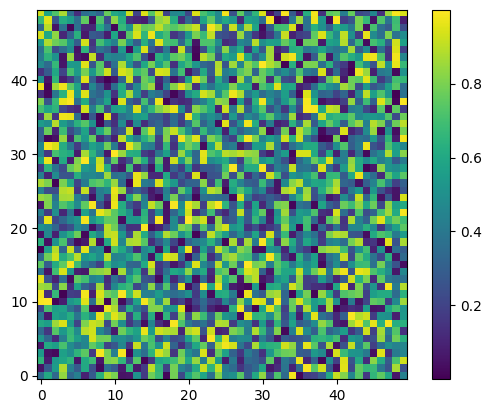

In [25]:
import matplotlib.pyplot as plt
from astropy.io import fits

datalist = fits.open('/content/example_beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_YX.fits')
print(datalist.info())

head = datalist[0].header
data = datalist[0].data

print(len(data))
im1 = plt.imshow(data[3][0,:,:], origin='lower')  # Change 'origin' from 'image' to 'lower'
plt.colorbar(im1)

datalist.close()  # Close the FITS file after using it


**CONVERTING .SAV FILES TO NUMPY ARRAYS**

People using IDL would usually store their arrays in *.sav* files. This is equivalent to *.npy* Python save files that we saw eariler. These files are usually in binary format and one can read the same if the format is known before hand.

Python *Scipy* also has some I/O routines and one of them is just decicated to reading *.sav* files generated from IDL.

In [26]:
from scipy.io import readsav

D = readsav('python_test_files.sav')   # Outputs a dictionary with the keys same as the variable names.
print(D.keys())

plt.plot(D['x'], D['y1'], lw=2, c='b')

Exception: ignored

**Numpy loadtxt** with datatypes.

In [ ]:
cus_dtype = np.dtype?

In [ ]:
cus_dtype = np.dtype([('Obs Name', 'S256'), ('Avg KT', 'f8'), ('Peak kT','f8'), ('AvgNorm','f8'), ('PeakNorm','f8')])
Obname, avT, pkT, avN, pkN = np.loadtxt('parosc2.txt',dtype=cus_dtype, unpack=True)